In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving the Time-Independent Schrödinger Equation Using the Shooting Method

## Introduction

The **time-independent Schrödinger equation (TISE)** in one dimension is given by:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
$$

Here:
- $\psi(x)$ is the wavefunction.
- $V(x)$ is the potential energy.
- $E$ is the energy eigenvalue.
- $\hbar$ is the reduced Planck constant.
- \(m\) is the particle's mass.

The shooting method is a numerical technique to solve boundary value problems like the TISE. It involves guessing the energy eigenvalue \(E\) and integrating the equation to see if the solution satisfies the required boundary conditions.

---

## Steps of the Shooting Method

### 1. Reformulate the TISE as a System of First-Order ODEs
Rewrite the second-order differential equation as two coupled first-order equations:

$
\psi'(x) = \phi(x)
$
$
\phi'(x) = \frac{2m}{\hbar^2}(V(x) - E)\psi(x)
$

Here:
- $\phi(x) = \frac{d\psi(x)}{dx}$ is an auxiliary function.

### 2. Define the Boundary Conditions
The wavefunction $\psi(x)$ must satisfy physical boundary conditions:
- $\psi(x) \to 0$ as $x \to \pm\infty$ for bound states.
- In practical computations, we define $\psi(x_{\text{min}}) = 0$ and guess $\phi(x_{\text{min}})$.

### 3. Guess an Initial Energy \(E\)
Choose a trial energy $E_0$. The goal is to adjust $E$ so that the wavefunction satisfies boundary conditions at the other end of the domain $x_{\text{max}}$.

### 4. Numerically Integrate the System
Use a numerical method (e.g., Runge-Kutta) to integrate the coupled ODEs from $x_{\text{min}}$ to $x_{\text{max}}$. Record the value of $\psi(x)$ at $x_{\text{max}}$.

### 5. Check the Boundary Condition at $x_{\text{max}}$
After integration:
- If $\psi(x_{\text{max}}) \neq 0$, adjust the energy $E$ and repeat.
- Use root-finding techniques (e.g., bisection or Newton's method) to refine $E$.

### 6. Normalize the Wavefunction
Once the correct $E$ is found, normalize the wavefunction:

$$
\int_{x_{\text{min}}}^{x_{\text{max}}} |\psi(x)|^2 dx = 1
$$

---

## Algorithm

1. Choose a domain $[x_{\text{min}}, x_{\text{max}}]$ and discretize it.
2. Set initial conditions:
   - $\psi(x_{\text{min}}) = 0$
   - $\phi(x_{\text{min}}) = 1$(arbitrary nonzero value for slope)
3. Guess an initial energy $E_0$.
4. Numerically solve the ODEs using the guessed $E_0$.
5. Check the boundary condition at $x_{\text{max}}$:
   - If $\psi(x_{\text{max}})$ does not satisfy the desired condition, adjust $E$.
   - Repeat until convergence.
6. Normalize the wavefunction and obtain the final solution.

---

## Numerical Example

To demonstrate the shooting method, consider a particle in a **finite square well potential**:

$
V(x) =
\begin{cases} 
0 & \text{if } |x| \leq a, \\
V_0 & \text{if } |x| > a.
\end{cases}
$

### Steps for Implementation:
1. Define the potential $V(x)$.
2. Initialize boundary conditions and trial energy $E_0$.
3. Integrate the TISE using a numerical method.
4. Adjust $E$ iteratively until convergence.

---





In numerical analysis, the shooting method is a method for solving a boundary value problem by reducing it to an initial value problem. It involves finding solutions to the initial value problem for different initial conditions until one finds the solution that also satisfies the boundary conditions of the boundary value problem. In layman's terms, one "shoots" out trajectories in different directions from one boundary until one finds the trajectory that "hits" the other boundary condition.

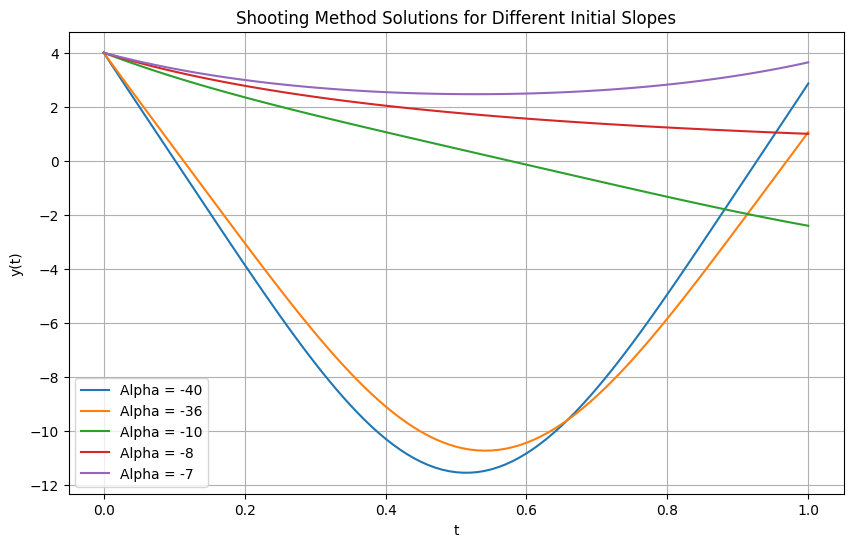

In [2]:
# Define the function f(t, y, z) for w''(t) = 1.5 * (w(t))^2
def f(t, y, z):
    return 1.5 * y**2

# Define the ODE system
def ode_system(t, y, alpha):
    dydt = y[1]
    dzdt = f(t, y[0], y[1])
    return np.array([dydt, dzdt])

# Runge-Kutta solver for IVP
def runga_kutta_solver(t0, t1, y0, alpha, h):
    n_steps = int((t1 - t0) / h)
    t = t0
    y = np.array([y0, alpha], dtype=float)
    
    for i in range(n_steps):
        k1 = h * ode_system(t, y, alpha)
        k2 = h * ode_system(t + h / 2, y + k1 / 2, alpha)
        k3 = h * ode_system(t + h / 2, y + k2 / 2, alpha)
        k4 = h * ode_system(t + h, y + k3, alpha)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h
        
    return y[1] 

# Shooting method to solve BVP for multiple slopes
def shooting_method_multiple_slopes(t0, t1, y0, y1, h, alpha_vals):
    results = {}  # Store results for each alpha value
    for alpha in alpha_vals:
        # Solve the IVP with the current alpha
        n_steps = int((t1 - t0) / h)
        t_values = np.linspace(t0, t1, n_steps + 1)
        y_values = []
        y = np.array([y0, alpha], dtype=float)
        
        for t in t_values:
            y_values.append(y[0])
            k1 = h * ode_system(t, y, alpha)
            k2 = h * ode_system(t + h / 2, y + k1 / 2, alpha)
            k3 = h * ode_system(t + h / 2, y + k2 / 2, alpha)
            k4 = h * ode_system(t + h, y + k3, alpha)
            y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
        results[alpha] = np.array(y_values)  # Store the results for this alpha
    return t_values, results

# Example usage with multiple initial slopes
alpha_vals = [-40, -36, -10, -8, -7]
t0, t1 = 0, 1
y0, y1 = 4, 1
h = 0.01

# Get the time values and results for each slope
t_values, y_results = shooting_method_multiple_slopes(t0, t1, y0, y1, h, alpha_vals)

# Plotting the results
plt.figure(figsize=(10, 6))
for alpha in alpha_vals:
    plt.plot(t_values, y_results[alpha], label=f'Alpha = {alpha}')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Shooting Method Solutions for Different Initial Slopes')
plt.legend()
plt.grid(True)
plt.show()


# Solving Boundary-Value Problems Using the Shooting Method

Suppose one wants to solve the boundary-value problem:

$$
y''(t) = f(t, y(t), y'(t)'), \quad y(t_0) = y_0, \quad y(t_1) = y_1.
$$

Let $ y(t; a) $solve the initial-value problem:

$$
y''(t) = f(t, y(t), y'(t)'), \quad y(t_0) = y_0, \quad y'(t_0)' = a.
$$

If $ y(t_1; a) = y_1 $, then $ y(t; a) $ is also a solution of the boundary-value problem.

---

The **shooting method** is the process of solving the initial value problem for many different values of $ a $ until one finds the solution $ y(t; a) $ that satisfies the desired boundary conditions. Typically, this is done **numerically**. The solution(s) correspond to the root(s) of:

$$
F(a) = y(t_1; a) - y_1.
$$

To systematically vary the shooting parameter $ a $ and find the root, one can employ standard root-finding algorithms like the **bisection method** or **Newton's method**.


### Key Observations:
- Roots of $ F $ and solutions to the boundary value problem are equivalent. If $ a $ is a root of $ F $, then $ y(t; a) $ is a solution of the boundary-value problem.
- Conversely, if the boundary value problem has a solution $ y(t) $, it is also the unique solution $ y(t; a) $ of the initial value problem where $ a = y'(t_0) $, so $ a $ is a root of $ F $.


### Standard Boundary Value Problem